# KNN and Decision Tree models

In [1]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# read train and test data

from datetime import datetime
import os

# train_data
train_data_files = sorted([f for f in os.listdir("data") if (f.endswith(".csv") and (f.startswith("train_data_")))], reverse=True)
latest_train_data = train_data_files[0]
train_data = pd.read_csv(f"data/{latest_train_data}")

# drop new generated index column
train_data.drop(train_data.columns[0], axis=1, inplace=True)
display(train_data.head())

# split train_data for models
y_train = train_data['Survived']
X_train = train_data.drop('Survived', axis=1)


# test_data
test_data_files = sorted([f for f in os.listdir("data") if (f.endswith(".csv") and (f.startswith("test_data_")))], reverse=True)
latest_test_data = test_data_files[0]
test_data = pd.read_csv(f"data/{latest_test_data}")

#drop new generated index column
test_data.drop(test_data.columns[0], axis=1, inplace=True)
display(test_data.head())

# split test_data for models
y_test = test_data['Survived']
X_test = test_data.drop('Survived', axis=1)

,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble,Survived
0,1,0,2,1,0,4,7,0,0,1,1,0,0,0,0,1
1,3,0,0,0,3,1,0,0,0,1,0,1,0,0,0,0
2,3,1,1,1,0,2,0,0,0,1,0,0,0,1,0,1
3,2,1,2,1,4,3,0,0,0,1,0,1,0,0,0,0
4,2,1,1,1,4,3,0,0,0,1,0,1,0,0,0,0


,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble,Survived
0,3,1,1,0,0,2,0,1,0,0,1,0,0,0,0,1
1,2,0,0,1,3,1,0,0,0,1,0,1,0,0,0,0
2,3,0,0,1,2,1,0,0,0,1,0,1,0,0,0,0
3,2,0,1,1,0,3,0,0,0,1,0,0,0,1,0,1
4,3,1,0,1,1,2,0,1,0,0,0,0,0,1,0,1


In [3]:
# import relevant packages for modeling
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier

### KNN

Grid Search for KNN

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import random

# Set seed to get always same results
random.seed(10)

# create an estimator
knn = KNeighborsClassifier()

# specify the parameter grid
parameters = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(10,61),
    'metric':['cityblock', 'euclidean', 'l1', 'l2', 'manhattan'] 
}

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the grid search instance
grid_search_estimator = GridSearchCV(knn, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False, error_score = 'raise')

# run the grid search
grid_search_estimator.fit(X_train,y_train)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)
    
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007518,0.003319,0.008366,0.002100,auto,10,cityblock,1,uniform,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",...,0.806452,0.709677,0.758065,0.741935,0.661290,0.725806,0.725806,0.738300,0.039124,20305
1,0.002105,0.003168,0.004760,0.003500,auto,10,cityblock,1,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",...,0.806452,0.709677,0.758065,0.741935,0.661290,0.725806,0.725806,0.738300,0.039124,20305
2,0.006998,0.002366,0.007903,0.001945,auto,10,cityblock,2,uniform,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",...,0.790323,0.790323,0.822581,0.758065,0.709677,0.677419,0.790323,0.770379,0.045340,17018
3,0.003206,0.002134,0.004203,0.003171,auto,10,cityblock,2,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",...,0.822581,0.741935,0.806452,0.774194,0.693548,0.709677,0.806452,0.779928,0.047889,16289
4,0.004110,0.001996,0.005830,0.002285,auto,10,cityblock,3,uniform,"{'algorithm': 'auto', 'leaf_size': 10, 'metric...",...,0.838710,0.838710,0.822581,0.741935,0.774194,0.774194,0.822581,0.808909,0.037943,10898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,0.003277,0.002711,0.004226,0.002661,brute,60,manhattan,8,distance,"{'algorithm': 'brute', 'leaf_size': 60, 'metri...",...,0.854839,0.806452,0.806452,0.806452,0.790323,0.758065,0.870968,0.829672,0.040190,616
20396,0.003551,0.002649,0.009025,0.001469,brute,60,manhattan,9,uniform,"{'algorithm': 'brute', 'leaf_size': 60, 'metri...",...,0.838710,0.838710,0.806452,0.790323,0.758065,0.725806,0.854839,0.820020,0.046105,3719
20397,0.001600,0.001796,0.007745,0.001819,brute,60,manhattan,9,distance,"{'algorithm': 'brute', 'leaf_size': 60, 'metri...",...,0.854839,0.790323,0.806452,0.822581,0.806452,0.725806,0.870968,0.826472,0.044830,1135
20398,0.002788,0.002206,0.010320,0.001847,brute,60,manhattan,10,uniform,"{'algorithm': 'brute', 'leaf_size': 60, 'metri...",...,0.822581,0.838710,0.806452,0.838710,0.790323,0.758065,0.806452,0.818510,0.027622,4246


best score is 0.8345622119815668 with params {'algorithm': 'brute', 'leaf_size': 10, 'metric': 'cityblock', 'n_neighbors': 10, 'weights': 'distance'}


Scoring with accuracy and fixed train test split:  
metric, k = [1,20]   
best score is 0.8393497183819763 with params {'algorithm': 'ball_tree', 'leaf_size': 36, 'metric': 'cityblock', 'n_neighbors': 15, 'weights': 'distance'}

metric, k = [1,10]  
best score is 0.8345622119815668 with params {'algorithm': 'brute', 'leaf_size': 10, 'metric': 'cityblock', 'n_neighbors': 10, 'weights': 'distance'}

p, k = [1,20]  
best score is 0.8393497183819763 with params {'algorithm': 'ball_tree', 'leaf_size': 36, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

p, k = [1,10]  
best score is 0.8345622119815668 with params {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}



In [53]:
from tabulate import tabulate

info_KNN = [['Parameters Grid Search', 'Best Parameter Combi', 'Accuracy on train data', 'Accuracy on test data'],
            ['metric:[cityblock, euclidean, l1, l2, manhattan]; no p, k: [1,20]', 'algorithm = ball_tree, leaf_size = 36, metric = cityblock, n_neighbors = 15, weights = distance', 0.839349718381976, 0.7947761194029851],
            ['metric:[cityblock, euclidean, l1, l2, manhattan]; no p, k: [1,10]', 'algorithm = brute, leaf_size = 10, n_neighbors = 10, metric = cityblock, weights = distance', 0.8345622119815668, 0.7910447761194029],
            ['no metric, p:range(1,5), k = [1,20]', 'algorithm = ball_tree, leaf_size = 36, n_neighbors = 15, p = 1, weights = distance', 0.8393497183819763, 0.7947761194029851 ],
            ['no metric, p:range(1,5), k = [1,10]', 'algorithm = brute, leaf_size = 10, n_neighbors = 10, p = 1, weights = distance', 0.8345622119815668, 0.7910447761194029 ]]

print(tabulate(info_KNN, headers = 'firstrow', tablefmt = 'fancy_grid'))


╒═══════════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════════════════╤═════════════════════════╕
│ Parameters Grid Search                                            │ Best Parameter Combi                                                                            │   Accuracy on train data │   Accuracy on test data │
╞═══════════════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════════════════╪═════════════════════════╡
│ metric:[cityblock, euclidean, l1, l2, manhattan]; no p, k: [1,20] │ algorithm = ball_tree, leaf_size = 36, metric = cityblock, n_neighbors = 15, weights = distance │                 0.83935  │                0.794776 │
├───────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────

In [4]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 36, metric = 'cityblock', n_neighbors = 15, weights = 'distance')
knn.fit(X_train, y_train)

knn2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn2.fit(X_train, y_train)

# Get the predicitions
y_pred = knn.predict(X_test) 
y_pred2 = knn2.predict(X_test)

In [5]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.74      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [5]:
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

print('Accuracy Score2: {}'.format(accuracy_score(y_test, y_pred2)))
print('F1 Score2: {}'.format(f1_score(y_test, y_pred2)))

Accuracy Score: 0.7947761194029851
F1 Score: 0.7488584474885844
Accuracy Score2: 0.8022388059701493
F1 Score2: 0.7488151658767773


We don't need to scale our data because we have only categorical values and no numerical after the preprocessing.

### Decision Trees

Hyper-Parameter Tuning with Grid Search

In [6]:
from sklearn.tree import DecisionTreeClassifier

Grid Search for Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

random.seed(10)

# create an estimator
dt = DecisionTreeClassifier()

# specify the parameter grid
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'min_samples_split': range(2,16),
    'min_samples_leaf': range(1,16),
    'max_features': range(1,16),
    'min_impurity_decrease': [0.01, 0.005, 0.001],
    'class_weight': [None, 'balanced']

}

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the grid search instance
grid_search_estimator = GridSearchCV(dt, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False, error_score = 'raise')

# run the grid search
grid_search_estimator.fit(X_train,y_train)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)
    
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003487,0.003806,0.003401,0.003083,None,gini,1,0.01,1,2,...,0.774194,0.725806,0.564516,0.693548,0.677419,0.596774,0.661290,0.670942,0.059875,109630
1,0.001300,0.001625,0.004043,0.003573,None,gini,1,0.01,1,2,...,0.629032,0.774194,0.629032,0.629032,0.629032,0.661290,0.693548,0.651818,0.046170,111354
2,0.003176,0.003297,0.001452,0.002462,None,gini,1,0.01,1,3,...,0.629032,0.677419,0.629032,0.709677,0.629032,0.629032,0.629032,0.648464,0.028287,111563
3,0.002296,0.002717,0.002126,0.003034,None,gini,1,0.01,1,3,...,0.629032,0.661290,0.629032,0.629032,0.677419,0.629032,0.661290,0.659549,0.036941,110793
4,0.002418,0.002891,0.000875,0.001763,None,gini,1,0.01,1,4,...,0.870968,0.725806,0.677419,0.629032,0.629032,0.709677,0.693548,0.690374,0.069398,107294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113395,0.000496,0.000799,0.001972,0.004617,balanced,log_loss,15,0.001,15,13,...,0.790323,0.774194,0.838710,0.741935,0.758065,0.709677,0.838710,0.789606,0.047789,69431
113396,0.003183,0.005366,0.000000,0.000000,balanced,log_loss,15,0.001,15,14,...,0.854839,0.790323,0.806452,0.774194,0.838710,0.725806,0.870968,0.818510,0.044212,13995
113397,0.001563,0.004689,0.001560,0.004679,balanced,log_loss,15,0.001,15,14,...,0.887097,0.806452,0.758065,0.790323,0.774194,0.741935,0.870968,0.816871,0.048360,17157
113398,0.003178,0.006357,0.000000,0.000000,balanced,log_loss,15,0.001,15,15,...,0.854839,0.790323,0.806452,0.774194,0.838710,0.725806,0.870968,0.818510,0.044212,13995


best score is 0.852227342549923 with params {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 14, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 6, 'min_samples_split': 6, 'splitter': 'best'}


Min_impurity_increase: [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]  
best score is 0.8392729134664618 with params {'class_weight': None, 'criterion': 'log_loss', 'max_features': 10, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 9, 'min_samples_split': 15, 'splitter': 'best'}

Min_impurity_increase: [0.01, 0.005, 0.001]  
best score is 0.852227342549923 with params {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 14, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 6, 'min_samples_split': 6, 'splitter': 'best'}

In [11]:
# Apply model from grid search
dt = DecisionTreeClassifier( class_weight = None, criterion = 'log_loss', max_features = 10, min_impurity_decrease = 0.01, min_samples_leaf = 9, min_samples_split = 15, splitter = 'best', random_state=500)
dt.fit(X_train, y_train)

# Get the predicitions
y_pred = dt.predict(X_test) 




In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.73      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



Accuracy on test data first grid search: 0.8208955223880597

Accuracy on test data second grid search: 0.7985074626865671


rando_state = 42  
Accuracy Score: 0.8171641791044776  
F1 Score: 0.7762557077625571

random.seed(10)  
Accuracy Score: 0.8171641791044776  
F1 Score: 0.7762557077625571

random_state = 500  
Accuracy Score: 0.8283582089552238  
F1 Score: 0.7788461538461539  

In [13]:
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))


Accuracy Score: 0.8283582089552238
F1 Score: 0.7788461538461539


In [14]:
from tabulate import tabulate

info = [['Min_impurity_increase', 'Parameter Combi', 'Accuracy on train data', 'Accuracy on test data'],
        ['[0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]', 'class_weight = None, criterion = log_loss, max_features = 10, min_impurity_decrease = 0.01, min_samples_leaf = 9, min_samples_split = 15, splitter = best',  0.8392729134664618, 0.8208955223880597],
        ['[0.01, 0.005, 0.001]',  'class_weight = balanced, criterion = entropy, max_features = 14, min_impurity_decrease = 0.001, min_samples_leaf = 6, min_samples_split = 6, splitter = best', 0.852227342549923, 0.7985074626865671]]

print(tabulate(info, headers = 'firstrow', tablefmt = 'fancy_grid'))


╒═══════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════════════════╤═════════════════════════╕
│ Min_impurity_increase                 │ Parameter Combi                                                                                                                                              │   Accuracy on train data │   Accuracy on test data │
╞═══════════════════════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════════════════╪═════════════════════════╡
│ [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01] │ class_weight = None, criterion = log_loss, max_features = 10, min_impurity_decrease = 0.01, min_samples_leaf = 9, min_samples_split = 15, splitter = best    │                 0.839273 │           

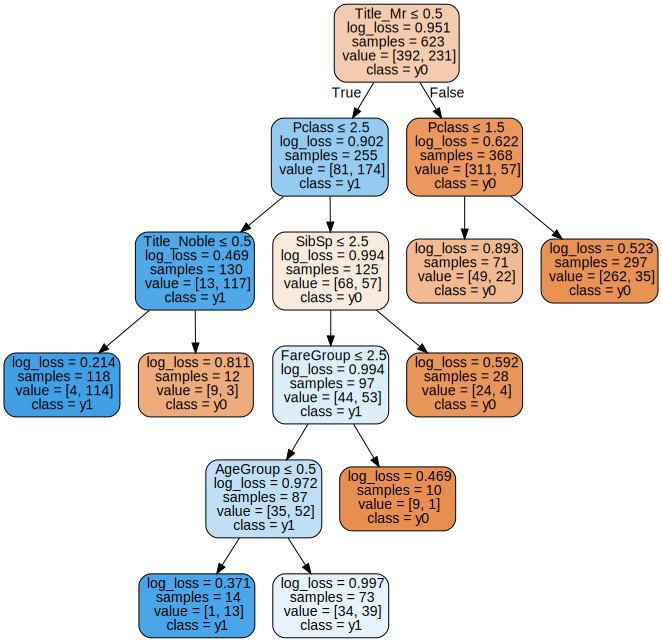

In [15]:
# Visualize the tree

import os
os.environ['PATH'] += ';C:\\Program Files (x86)\\Graphviz2.38\\bin'

import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names= True,
                               filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 

display(graph)




In [16]:
forest = dt
importances = pd.DataFrame({'feature':X_train.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

NameError: name 'np' is not defined